# Testing Assumptions
1. State Assumptions
2. Check Assumptions with figures using:
    * residuals
    * correlations
    * Number of modes

## Step 1: State Assumptions For Our Data
We have data X = {$X_i: i={1,...,n}, X_i ~ i.i.d. F$}

1. X_i are all identically and independently distributed in the distribution F.

All our data is i.i.d. So can check using a correlation matrix -> only checks for linear dependencies
-> can plot histogram of correlations to see if there are outliers

Plot scatter plots of each X_i with each other


paired scatter plots - plot subsamples

## Step 2: Check Assumptions

Ideas: Compute the comparison statistic for independence for "rows" closest to each other vs. farthest away
Read paper and compute the independence test

In [23]:
# Import Necessary Libraries
import numpy as np
import os, csv, json
import math
import random

from matplotlib import *
from matplotlib import pyplot as plt

import scipy
import itertools
from sklearn.decomposition import PCA
from sklearn.cluster import MiniBatchKMeans
from sklearn import cluster

# pretty charting
import seaborn as sns
sns.set_palette('muted')
sns.set_style('darkgrid')

%matplotlib inline

In [2]:
#### RUN AT BEGINNING AND TRY NOT TO RUN AGAIN - TAKES WAY TOO LONG ####
# write new list_of_features to new txt file
csvfile = "data_normalized/shortenedFeatures_normalized.txt"

# load in the feature data
list_of_features = []
with open(csvfile) as file:
    for line in file:
        inner_list = [float(elt.strip()) for elt in line.split(',')]
        
        # create list of features
        list_of_features.append(inner_list)

# conver to a numpy matrix
list_of_features = np.array(list_of_features)

In [3]:
# 01A

#### RUN AT BEGINNING AND TRY NOT TO RUN AGAIN - TAKES WAY TOO LONG ####
# read in normalized data locations
csvfile = "data_normalized/locations_normalized.txt"

# load in the feature data
list_of_locations = []
with open(csvfile) as file:
    for line in file:
        inner_list = [float(elt.strip()) for elt in line.split(',')]
        
        # create list of features
        list_of_locations.append(inner_list)

# convert to a numpy matrix
list_of_locations = np.array(list_of_locations)

In [55]:
# 01B

#### RUN AT BEGINNING AND TRY NOT TO RUN AGAIN - TAKES WAY TOO LONG ####
#### this is only to run for non-normalized to see if we get the same results
csvfile = "data/synapsinR_7thA.tif.Pivots.txt"

# load in the feature data
list_of_locations = []
with open(csvfile) as file:
    for line in file:
        inner_list = [float(elt.strip()) for elt in line.split(',')]
        
        # create list of features
        list_of_locations.append(inner_list)

# convert to a numpy matrix
list_of_locations = np.array(list_of_locations)

In [4]:
ten_means = MiniBatchKMeans(n_clusters=10).fit(list_of_features)

In [5]:
true_means = MiniBatchKMeans(n_clusters=17).fit(list_of_features)

In [6]:
thirty_means = MiniBatchKMeans(n_clusters=30).fit(list_of_features)

(10, 96)
(17, 96)
(30, 96)


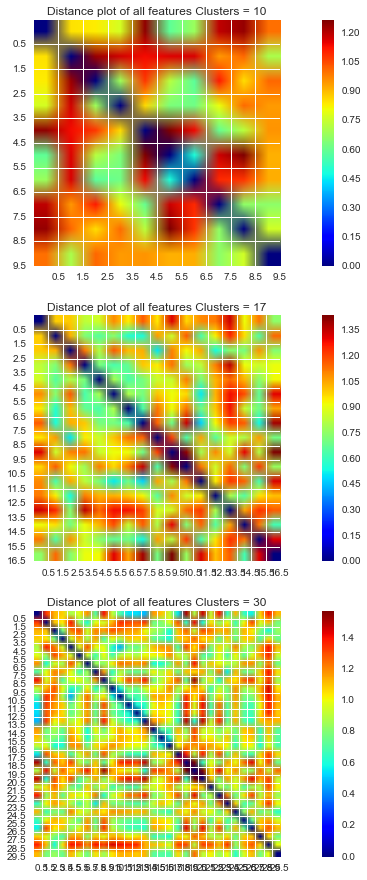

In [7]:
# compute distances between each centroid
centroids = ten_means.cluster_centers_
print centroids.shape
distances = scipy.spatial.distance.pdist(centroids)
distances = scipy.spatial.distance.squareform(distances)

true_centroids = true_means.cluster_centers_
print true_centroids.shape
true_distances = scipy.spatial.distance.pdist(true_centroids)
true_distances = scipy.spatial.distance.squareform(true_distances)

thirty_centroids = thirty_means.cluster_centers_
print thirty_centroids.shape
thirty_distances = scipy.spatial.distance.pdist(thirty_centroids)
thirty_distances = scipy.spatial.distance.squareform(thirty_distances)

# Plot the distances
fig = plt.figure(figsize=(15,15))
fig.add_subplot(311)
plt.imshow(distances, cmap=plt.get_cmap('jet'))
plt.title("Distance plot of all features Clusters = 10")
plt.yticks(np.arange(0.5,10.5, 1))
plt.xticks(np.arange(0.5,10.5, 1))
plt.colorbar()

fig.add_subplot(312)
plt.imshow(true_distances, cmap=plt.get_cmap('jet'))
plt.title("Distance plot of all features Clusters = 17")
plt.yticks(np.arange(0.5,17.5, 1))
plt.xticks(np.arange(0.5,17.5, 1))
plt.colorbar()

fig.add_subplot(313)
plt.imshow(thirty_distances, cmap=plt.get_cmap('jet'))
plt.title("Distance plot of all features Clusters = 30")
plt.yticks(np.arange(0.5,30.5, 1))
plt.xticks(np.arange(0.5,30.5, 1))
plt.colorbar()

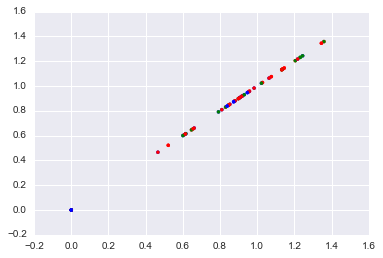

In [34]:
colors = np.array([x for x in 'bgrcmykbgrcmykbgrcmykbgrcmyk'])
colors = np.hstack([colors] * 20)

spectral = cluster.SpectralClustering(n_clusters=3,
                                          eigen_solver='arpack',
                                          affinity="nearest_neighbors")

test = spectral.fit_predict(distances)
#  plt.scatter(X[:, 0], X[:, 1], color=colors[y_pred].tolist(), s=10)
plt.scatter(distances, distances, color=colors[test], s=10)
# plt.imshow(distances, s=10)
# fig = plt.figure(figsize=(10,10))
# plt.imshow(distances, cmap=plt.get_cmap('jet'))
# plt.title("Distance plot of all features Clusters")
# plt.yticks(np.arange(0.5,10.5, 1))
# plt.xticks(np.arange(0.5,10.5, 1))
# plt.colorbar()

In [10]:
true_indices = true_means.predict(list_of_features)

%reset_selective ten_means thirty_means

Once deleted, variables cannot be recovered. Proceed (y/[n])?  y


In [11]:
from collections import defaultdict

clusters = defaultdict(list)
location_clusters = defaultdict(list)

for i in range(0, len(true_indices)):
    clusters[true_indices[i]].append(list_of_features[i])
    location_clusters[true_indices[i]].append(list_of_locations[i])
    
print clusters.keys()
print location_clusters.keys()

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]


In [20]:
sum_clust = 0
for key in clusters.keys():
#     sum_clust += len(clusters[key])
#     print len(clusters[key])
    sum_clust += len(location_clusters[key])
    print len(location_clusters[key])

print sum_clust
print len(list_of_features)

39197
50631
68403
152644
61540
58927
68423
71682
62878
67246
80623
48490
34881
68959
44416
51158
89201
1119299
1119299


In [ ]:
#### plot of all locations <x,y,z> for all 17 clusters
fig = plt.figure(figsize=(15,5*17))

numrows = math.ceil(len(location_clusters.keys())/3.) # row in subplot
numrows = len(location_clusters.keys())

# plt.show()
index = 0
for i in location_clusters.keys():
    locations = np.array(location_clusters[i])
    
    x_locs = locations[0,:]
    y_locs = locations[1,:]
    z_locs = locations[2,:]

    plt.subplot(numrows, 3, index+1)
    plt.hist(x_locs)
    plt.subplot(numrows, 3, index+2)
    plt.hist(y_locs)
    plt.subplot(numrows, 3, index+3)
    plt.hist(z_locs)
    plt.xlabel('range of locations')
    plt.ylabel('frequency')
    
    index += 3 # index for the locations

In [85]:
#### Set up R Independence Test 
from rpy2 import robjects
from rpy2.robjects import r
from pandas.rpy.common import load_data

#### Rejects if dependent data
r('''
f <- function(x, y, verbose=FALSE) {
    if (verbose) {
        cat("I am calling independence test with energy package.\n")
    }
    energy::indep.test(x, y, method="mvI", R=99)
}
''')

indep_test = r['f']

ValueError: Error while trying to convert element 0 to a double.

In [78]:
np.random.seed(12345678)  # for reproducibility, set random seed

# Need to first downsample
rand_indices = random.sample(range(0,len(list_of_locations)), 50000)

# print list_of_locations[rand_indices]
# compute distance matrix of all locations relative to another
true_distances = scipy.spatial.distance.pdist(list_of_locations[rand_indices])

# downsample features and locations
list_of_features = list_of_features[rand_indices]
list_of_locations = list_of_locations[rand_indices]

print len(true_distances)
print true_distances.shape

1249975000
(1249975000,)


In [ ]:
##### Testing independence for each row that is close to another vs. farthest away #####
# 01: get feature
# 02: get closest and farthest feature using euclidean norm
# 03:

n = len(list_of_features)
pvals = np.array(())

print "The new length of features is: ", n
##01: Get Features
for i in range(0, len(list_of_features)): # loop through each feature and perform step 2
    feature = list_of_features[i] # get current features
    
    ##02: Get closest and farthest feature
    location = list_of_locations[i] # get location
    
    # search for closest location using euclidean norm
    # search for all j's * i through pdist struct
    j = range(i+1, n)
    if i == 0:
        indices_to_search = j
    else:
        indices_to_search = np.dot(i,j)
    
    # store the locations of the ones we have to search through for min/max
    compare_locations = true_distances[indices_to_search]
    close_index = list(compare_locations).index(min(compare_locations))
    far_index = list(compare_locations).index(max(compare_locations))
    
    # convert to indices in the list_of_locations/list_of_features
    if i==0:
        close_index = close_index
        far_index = far_index
    else:
        close_index = close_index/i
        far_index = far_index/i
    
    # find close and far feature
    close_feature = list_of_features[close_index]
    far_feature = list_of_features[far_index]
    
    ##03: compute independence test
    # first convert things to R data structures
    close_feature = robjects.FloatVector(close_feature)
    far_feature = robjects.FloatVector(far_feature)
    feature = robjects.FloatVector(feature)
    
    test_close = indep_test(feature, close_feature)
    test_far = indep_test(feature, far_feature)
    pval_close = test_close[4]
    pval_far = test_far[4]
    
    pvals = np.append(pvals, (pval_close, pval_far))

# Discussion:
Looking at the locations spread in each cluster, it's always bimodal...?